In [104]:
from src.model.classifier import ImageClassifier
from src.model.architectures.visual_transformer import VisionTransformer
import matplotlib.pyplot as plt
import numpy as np
import torch
from src.data.datamodules import ImageNet100DataModule, CIFAR10DataModule
from src.data.datasets import CIFAR10
from sklearn.decomposition import PCA

from src.data.transform import Patchify
from torchvision import transforms

def get_val_image(idx):
    inference_transform = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize([0.49139968, 0.48215841, 0.44653091], [0.24703223, 0.24348513, 0.26158784]),
                                         Patchify((4, 4)),
                                         ])
    dataset = CIFAR10(transform=inference_transform)
    image = torch.unsqueeze(dataset[idx]['image'], 0)
    return image

def get_vit():
    mock_factory = lambda x: x
    m = VisionTransformer(
        emb_dim=256, 
        flatten_patch_dim=32*32*3, 
        num_blocks=6, 
        num_heads=8, 
        num_patches=49, 
        num_classes=100, 
        dim_feedforward=512,
        dropout=0.2,
        )
    classifier = ImageClassifier.load_from_checkpoint(
        model=m, 
        optimizer_factory=mock_factory, 
        num_classes=100, 
        checkpoint_path="/home/piotr/github/vision-transformer/logs/imagenet100_vit_32/lightning_logs/version_0/checkpoints/test.ckpt",
    )
    classifier.eval()
    return classifier.model


def get_emb_projection(model):
    return model.linear_projection.weight.detach().cpu().numpy().T

In [105]:
model = get_vit()
emb_projection = get_emb_projection(model)
pca = PCA(n_components=25)
emb_pca = pca.fit_transform(emb_projection)

In [106]:
emb_projection

array([[-0.09891242,  0.13922028,  0.03362755, ..., -0.08062255,
         0.08630762,  0.05307925],
       [-0.05322333,  0.04971873,  0.12421989, ..., -0.18656915,
         0.13875887, -0.0637165 ],
       [ 0.07288325,  0.13654451,  0.17973572, ..., -0.20728622,
         0.11956053, -0.08926561],
       ...,
       [-0.09154389,  0.04695289, -0.23224862, ...,  0.09987232,
         0.05427654, -0.0280402 ],
       [-0.03466963,  0.16912676, -0.20353708, ...,  0.13069293,
         0.02026827, -0.08565542],
       [ 0.01087609,  0.35756075, -0.26887047, ...,  0.30594885,
        -0.09400137, -0.15177278]], dtype=float32)

In [107]:
emb_pca.shape

(3072, 25)

/tmp/ipykernel_2371/3290871428.py:6: RuntimeWarning: invalid value encountered in sqrt
  axs[idx].imshow(np.sqrt(patch[:, :, :]/10))
/home/piotr/github/vision-transformer/venv/lib/python3.10/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


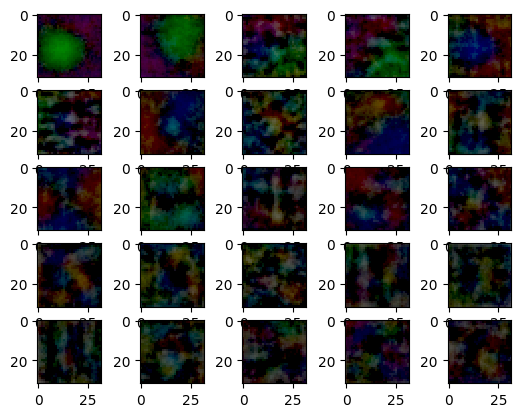

In [108]:
fig, axs = plt.subplots(5, 5)
axs = np.ravel(axs)
for idx in range(len(axs)):
    patch_flat = emb_pca[:, idx]
    patch = np.reshape(patch_flat, (3, 32, 32)).T
    axs[idx].imshow(np.sqrt(patch[:, :, :]/10))

In [19]:
from torchvision import models

# Original paper

In [85]:
vit_b16 = models.vit_b_16(models.ViT_B_16_Weights)
vit_b16.eval()

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [96]:
projection = vit_b16.conv_proj.weight.detach().numpy()
projection_flatten = np.reshape(projection, (768, 3*16*16))

In [87]:
projection_flatten.shape

(768, 768)

In [88]:
pca = PCA(n_components=28)
emb_pca = pca.fit_transform(projection_flatten.T)

In [89]:
from src.utils import image_utils 

/tmp/ipykernel_2371/216434718.py:6: RuntimeWarning: invalid value encountered in sqrt
  axs[idx].imshow(1.8*np.sqrt(patch[:, :, :]))
/home/piotr/github/vision-transformer/venv/lib/python3.10/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


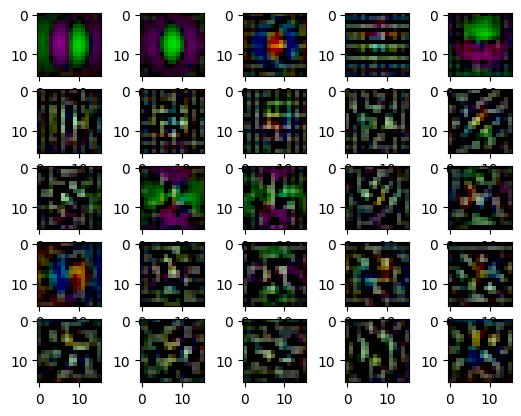

In [90]:
fig, axs = plt.subplots(5, 5)
axs = np.ravel(axs)
for idx in range(len(axs)):
    patch_flat = emb_pca[:, idx]
    patch = np.reshape(patch_flat, (3, 16, 16)).T
    axs[idx].imshow(1.8*np.sqrt(patch[:, :, :]))

In [57]:
import numpy as np
np.clip(patch[:, :, :], 0, 1)

array([[[4.3678801e-03, 0.0000000e+00, 0.0000000e+00],
        [4.1529685e-03, 0.0000000e+00, 0.0000000e+00],
        [5.7778512e-03, 0.0000000e+00, 0.0000000e+00],
        ...,
        [1.6212100e-04, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [5.3226827e-03, 0.0000000e+00, 0.0000000e+00]],

       [[5.9395609e-03, 0.0000000e+00, 0.0000000e+00],
        [3.7935346e-03, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 8.4051826e-06, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.8185052e-03, 0.0000000e+00],
        [5.1182648e-03, 4.5826714e-03, 7.0187468e-03]],

       [[3.5616662e-03, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [5.7386636e-04, 1.1809017e-03, 0.0000000e+00],
        ...,
        [3.5755485e-03, 4.1537834e-03, 5.2877225e-04],
        [3.7283543e-03, 1.5167913e-03, 0.0000000e+00],
        [0.0000000e+00